In [1]:
import torch
import pickle
import matplotlib.pyplot as plt

In [5]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

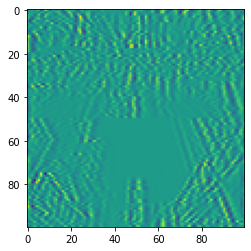

In [6]:
plt.imshow(broken_image.view(100,100)) # 오염된 이미지

In [7]:
def weird_function(x, n_iter=5): # 이미지를 오염시키는 함수
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [8]:
def distance_loss(hypothesis, broken_image): # 오차를 구하는 함수   
    return torch.dist(hypothesis, broken_image)

In [9]:
random_tensor = torch.randn(10000, dtype = torch.float) # 무작위 값 텐서 생성

In [10]:
lr = 0.8

for i in range(0,20000):
    random_tensor.requires_grad_(True) # 오차함수를 random_tensor로 미분할 것임
    
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    
    with torch.no_grad(): # 직접 경사하강법 구현하므로 no_grad()
        random_tensor = random_tensor - lr*random_tensor.grad  # 경사하강법의 동작
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item())) # 오차 출력

Loss at 0 = 12.283851623535156
Loss at 1000 = 1.127018690109253
Loss at 2000 = 0.5456101894378662
Loss at 3000 = 0.3808358907699585
Loss at 4000 = 0.3018395006656647
Loss at 5000 = 0.2525387406349182
Loss at 6000 = 0.21715106070041656
Loss at 7000 = 0.18928571045398712
Loss at 8000 = 0.16584472358226776
Loss at 9000 = 0.1451859325170517
Loss at 10000 = 0.12637953460216522
Loss at 11000 = 0.10886502265930176
Loss at 12000 = 0.09228566288948059
Loss at 13000 = 0.07640443742275238
Loss at 14000 = 0.061057064682245255
Loss at 15000 = 0.0461287796497345
Loss at 16000 = 0.03153863921761513
Loss at 17000 = 0.021144216880202293
Loss at 18000 = 0.02116493694484234
Loss at 19000 = 0.021166957914829254


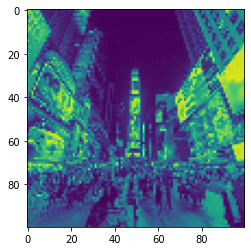

In [11]:
plt.imshow(random_tensor.view(100,100).data)  # 복원된 이미지